<a href="https://colab.research.google.com/github/DanieleBaiocco/IPCV_assignment1/blob/main/assignment_module_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip

Mounted at /content/drive
Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
   creating: dataset/scenes/
  inflating: __MACOSX/dataset/._scenes  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/models/
  inflating: __MACOSX/dataset/._models  
  inflating: dataset/scenes/scene12.png  
  inflating: __MACOSX/dataset/scenes/._scene12.png  
  inflating: dataset/scenes/scene10.png  
  inflating: __MACOSX/dataset/scenes/._scene10.png  
  inflating: dataset/scenes/scene11.png  
  inflating: __MACOSX/dataset/scenes/._scene11.png  
  inflating: dataset/scenes/scene5.png  
  inflating: __MACOSX/dataset/scenes/._scene5.png  
  inflating: dataset/scenes/scene4.png  
  inflating: __MACOSX/dataset/scenes/._scene4.png  
  inflating: dataset/scenes/scene6.png  
  inflating: __MACOSX/dataset/scenes/._scene6.png  
  inflating: dataset/scenes/scene7.png  
  inflating: __MACOSX/dataset/scenes/._scene7.png  
  inflating: 

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

TRACK A - SINGLE INSTANCE DETECTION

In [4]:
def create_list_of_paths(directory):
    image_files = os.listdir(directory)
    image_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
    image_files = [os.path.join(directory, image_file) for image_file in image_files]
    return image_files

In [5]:
images_directory = '/content/dataset'
reference_directory = os.path.join(images_directory, 'models')
scene_directory =  os.path.join(images_directory, 'scenes')
reference_files = create_list_of_paths(reference_directory)
scene_files = create_list_of_paths(scene_directory)

In [158]:
class Image:
    def __init__(self, path, is_colored, preprocess):
        self.image = None
        image = cv2.imread(path, is_colored)
        if preprocess:
          self._preprocess_image(image)
        else:
          self.image = image
        self.label = path.split("/")[-1]

    def _preprocess_image(self, image):
        image = cv2.medianBlur(image, ksize = 5)
        image = cv2.bilateralFilter(image, d=11, sigmaColor=75, sigmaSpace=20)
        self.image = cv2.fastNlMeansDenoisingColored(image, None, h=7,hColor=10,templateWindowSize =5,searchWindowSize =25)

In [162]:
def create_subset_of_images(list_of_paths, start, end, is_colored, preprocess = False):
  assert start < end and start >= 0 and end <= len(list_of_paths)
  subset_of_paths = list_of_paths[start:end]
  subset_of_images = []
  for idx, path in enumerate(subset_of_paths):
    image = Image(path, is_colored, preprocess)
    #if idx ==1:
    #      m = cv2.cvtColor(image.image, cv2.COLOR_BGR2RGB)
    #      plt.imshow(m)
    #      plt.show()
    subset_of_images.append(image)
  return subset_of_images

In [163]:
track_A_reference_images = create_subset_of_images(reference_files, start=0, end=14, is_colored =1)
track_A_scene_images = create_subset_of_images(scene_files, start=0, end=5, is_colored=1, preprocess =True)
track_B_reference_images = create_subset_of_images(reference_files, start=14, end=27, is_colored=1)

In [164]:
track_B_scene_images = create_subset_of_images(scene_files,  start=5, end=12, is_colored=1, preprocess=True)

## PROVA A USARE LE IMMAGINI COME GRAYSCALE, INVECE CHE RGB.

In [165]:
def compute_flann_2NN_matching(flann_index_kdtree, trees, checks, k):
  index_params = dict(algorithm = flann_index_kdtree, trees = trees)
  search_params = dict(checks = checks)
  flann = cv2.FlannBasedMatcher(index_params, search_params)
  def compute_flan(des_reference, des_scene):
      matches =  flann.knnMatch(des_reference,des_scene,k=k)
      good = []
      for m,n in matches:
          if m.distance < 0.7*n.distance:
              good.append(m)
      return good
  return compute_flan

In [166]:
def compute_homography(homography_method, ransacReprojThreshold):
  def find_homography(matches, kp_reference, kp_scene):
    src_pts = np.float32([ kp_reference[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, homography_method, ransacReprojThreshold)
    matchesMask = mask.ravel().tolist()
    return M, matchesMask
    ## POTREI FERMARMI QUI, ritornare la M con la mask e poi TUTTE INSIEME SULLA STESSA TARGET IMAGE outputtare le bounding boxes per ogni
    ## item (solo nel caso in cui ho un matchovviamente)
  return find_homography

In [167]:
lambda_matcher = compute_flann_2NN_matching(flann_index_kdtree = 1, trees = 15, checks = 100, k =2)

In [168]:
lambda_homography = compute_homography(homography_method = cv2.RANSAC, ransacReprojThreshold = 5.0)

In [169]:
def sift_instance_detection(reference_image, scene_image, perform_matcher, min_match_count, compute_homography):
  sift = cv2.xfeatures2d.SIFT_create()
  kp_reference = sift.detect(reference_image)
  kp_scene = sift.detect(scene_image)
  kp_reference, des_reference = sift.compute(reference_image, kp_reference)
  kp_scene, des_scene = sift.compute(scene_image, kp_scene)
  matches = perform_matcher(des_reference,des_scene)
  print(len(matches))
  if len(matches)<=min_match_count:
    return None
  M, mask = compute_homography(matches, kp_reference, kp_scene)
  return len(matches), M

Io devo usare il codice qua sotto per prendere l'omografia che mi fa andare da immagine del prodotto a immagine nella scena. Solo che devo farlo per mettere un rettangolo BIANCO nella scena. Una volta fatto devo settare gli altri pixels neri ai pixels dell'immagine della scena che avevo all'inizio.

# TODO
1. deblurra tutte le *scene images* con qualcosa: o usi un bel bilateral filter, o usi un median filter, o fai una combo di filters. Se noti punti bianchi puoi prima fare median filter per rimuoverli e poi bilateral/gaussian filter (penso bilateral e' comunque la way). Controlla pure non-local means filter che  puo' essere interessante
2. per matchare piu' di un elemento in una scena, segui il procedimento visto fin'ora fino al punto in cui hai M. Questa permettera' di fare un warp della reference image nella *scene image*. A questo punto, posso slidare sulla *scene image* utilizzando la *reference image warpata*. Posso fare in due modi in verita': o applico un matching usando similarity functions, OPPURE applico una shape matching (quindi facendo passare l'immagine warpata in un algoritmo di edge detection, calcolando poi per alcuni punti il gradiente).

3. DUBBI: non so se e' possibile runnare un salient point matching basato su differenti colori rgb per poi farne la media insomma ma mi sembra assurdo.
Non so se ci sono benefici nel far prima un edge detection, prima del salient point matching (ma dubito non ha molto senso).
Non so se ha senso in nessun momento fare edge detection in verita'.

In [170]:
def draw_bounding_box(bounding_box, reference_label, img_bounding_boxes):
    random_color = np.random.randint(0, 256, size=(3,)).tolist()
    label_shift = 60
    img_bounding_boxes = cv2.polylines(img_bounding_boxes,[np.int32(bounding_box)],True,random_color,10, cv2.LINE_AA)
    label_position = (int(bounding_box[0][0][0]) + label_shift, int(bounding_box[0][0][1]) + label_shift)
    cv2.putText(img_bounding_boxes, reference_label, label_position, cv2.FONT_HERSHEY_SIMPLEX, fontScale=2.0, color= (0,0,0), thickness =3)
    return img_bounding_boxes

In [171]:
def compute_box(h, w, M):
  pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
  dst = cv2.perspectiveTransform(pts,M)
  return dst

In [172]:
def compute_box_description(box_coordinates):
    x_values = [coord[0][0] for coord in box_coordinates]
    y_values = [coord[0][1] for coord in box_coordinates]
    x_sum = sum(x_values)
    y_sum = sum(y_values)
    num_coords = len(box_coordinates)
    center_x = round(x_sum / num_coords,3)
    center_y = round(y_sum / num_coords,3)
    width = round(max(x_values) - min(x_values),3)
    height = round(max(y_values) - min(y_values),3)
    return (center_x, center_y), width, height

In [173]:
import pandas as pd
items_found_cols = ['ref_label', 'dst', 'center', 'width', 'height', 'num_matches', 'M','ref_shape']
def find_items_in_scene_image(min_match_count, reference_images, scene_image, lambda_matcher, lambda_homography):
  df = []
  for reference_image in reference_images:
    ref_img = reference_image.image
    h_ref, w_ref, _ = ref_img.shape
    result = sift_instance_detection(ref_img, scene_image, lambda_matcher, min_match_count, lambda_homography)
    if result is not None:
      num_matches, M = result
      dst = compute_box(h_ref, w_ref, M)
      center, width, height = compute_box_description(dst)
      df.append([reference_image.label, dst, center, width, height, num_matches, M, (h_ref, w_ref)])
  return pd.DataFrame(df, columns = items_found_cols)

In [174]:
def calculate_iou(box1, box2):
    # Extract coordinates from the list of points
    box1_coords = [point[0] for point in box1]
    box2_coords = [point[0] for point in box2]

    # Get coordinates of the intersection rectangle
    x1 = max(box1_coords[0][0], box2_coords[0][0])
    y1 = max(box1_coords[0][1], box2_coords[0][1])
    x2 = min(box1_coords[2][0], box2_coords[2][0])
    y2 = min(box1_coords[2][1], box2_coords[2][1])

    # Calculate the area of intersection rectangle
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate the area of both bounding boxes
    box1_area = (box1_coords[2][0] - box1_coords[0][0] + 1) * (box1_coords[2][1] - box1_coords[0][1] + 1)
    box2_area = (box2_coords[2][0] - box2_coords[0][0] + 1) * (box2_coords[2][1] - box2_coords[0][1] + 1)

    # Calculate the union area
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou

def find_iou_clusters(boxes, threshold):
    # Initialize list to store clusters
    clusters = []

    # Iterate through each pair of boxes
    for i, box1 in enumerate(boxes):

        if any(i in c for c in clusters):
            continue
        # Create a new cluster with the first box
        cluster = [i]

        # Compare the first box with all other boxes
        for j, box2 in enumerate(boxes):
            # Skip comparing the box with itself
            if j>i:
                # Calculate IoU between the two boxes
                iou = calculate_iou(box1, box2)

                # If IoU is above threshold, add the box to the cluster
                if iou > threshold:
                    cluster.append(j)

        # Add the cluster to the list if it contains more than one box
        if len(cluster) > 1:
            clusters.append(cluster)

    return clusters

In [175]:
def remove_cluster_items(clusters, items_found):
    flat_clusters = [e for c in clusters for e in c]
    df = items_found[~items_found.index.isin(flat_clusters)].copy().reset_index(drop=True)
    for cluster in clusters:
      id_max = items_found.loc[cluster]['num_matches'].idxmax()
      df.loc[len(df)] = items_found.loc[id_max]
    return df

def show_matched_items(scene_image_label, scene_image, df_items_found):
    print(f'Scene image {scene_image_label}')
    image_bounding_boxes = scene_image.copy()
    for idx, row in df_items_found.iterrows():
      ref_label, dst, center, width, height, _, _, _  = row
      print(f"   Item found {ref_label} : [ position: {center}, width: {width} px, height: {height} px ]")
      image_bounding_boxes = draw_bounding_box(dst, ref_label, image_bounding_boxes)
    image_bounding_boxes_rgb = cv2.cvtColor(image_bounding_boxes, cv2.COLOR_BGR2RGB)
    plt.imshow(image_bounding_boxes_rgb)
    plt.show()

In [176]:
def compute_new_scene_image(scene_image, items_found):
    h_scene, w_scene, _ = scene_image.shape
    new_scene_image = scene_image.copy()
    for idx, item_found in items_found.iterrows():
          M = item_found['M']
          h_ref, w_ref = item_found['ref_shape']
          # Apply the transformation matrix
          white = np.ones([h_ref, w_ref, 3], dtype=np.uint8) * 255
          warped = cv2.warpPerspective(white, M, (w_scene,h_scene))
          black_pixels = np.equal(warped, np.array([0,0,0]))
          # Restore previous values
          warped[black_pixels] = new_scene_image[black_pixels]
          new_scene_image = warped

    return new_scene_image



In [177]:
def find_items_in_scene_images(min_match_count, reference_images, scene_images, lambda_matcher, lambda_homography):
  for scene_image in scene_images:
    scene_img = scene_image.image
    scene_img_copy = scene_img.copy()
    final_items_found = pd.DataFrame(columns=items_found_cols)
    while True:
      items_found = find_items_in_scene_image(min_match_count, reference_images, scene_img_copy, lambda_matcher, lambda_homography)
      if len(items_found) == 0:
        break
      clusters = find_iou_clusters(items_found['dst'], 0.5)
      final_items_found = pd.concat([final_items_found, remove_cluster_items(clusters, items_found)], axis = 0, ignore_index=True)
      scene_img_copy = compute_new_scene_image(scene_img_copy, final_items_found)
      plt.imshow(cv2.cvtColor(scene_img_copy, cv2.COLOR_BGR2RGB))
      plt.show()
    show_matched_items(scene_image.label, scene_img, final_items_found)

662
511
37
27
70
33
12
16
22
15
7
13
22
71


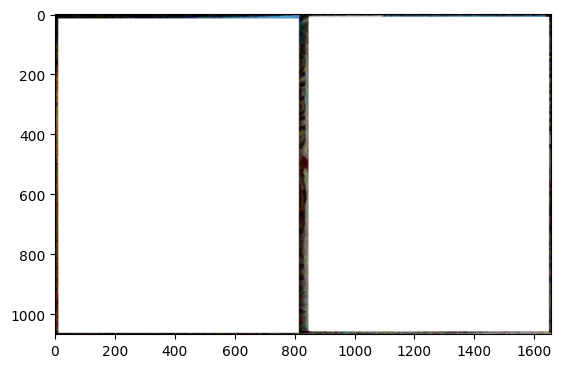

  ref_label                                                dst  \
0  ref1.png  [[[10.936875, 14.791522]], [[11.329544, 1063.2...   
1  ref2.png  [[[846.5205, 9.2409935]], [[846.1726, 1057.380...   

               center       width       height num_matches  \
0  (412.213, 538.935)  802.447021  1048.832031         662   
1  (1247.53, 533.415)  802.976013  1048.473999         511   

                                                   M    ref_shape  
0  [[0.9471015819027564, 0.00036204948329519014, ...  (1108, 848)  
1  [[0.947147602873512, 0.00018231524071275223, 8...  (1108, 848)  
14
15
8
16
9
6
3
9
14
1
10
7
6
7
Scene image scene1.png
   Item found ref1.png : [ position: (412.213, 538.935), width: 802.447021484375 px, height: 1048.83203125 px ]
   Item found ref2.png : [ position: (1247.53, 533.415), width: 802.9760131835938 px, height: 1048.4739990234375 px ]


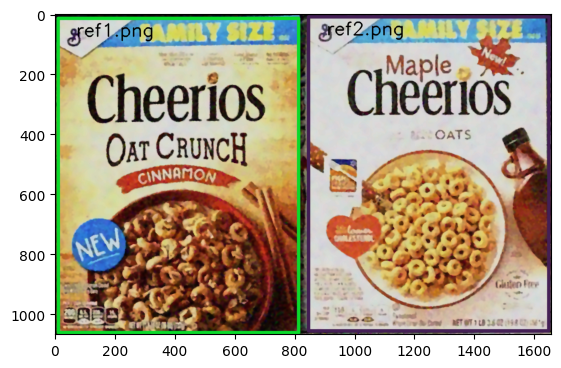

79
91
296
251
310
20
36
74
77
49
16
14
30
78


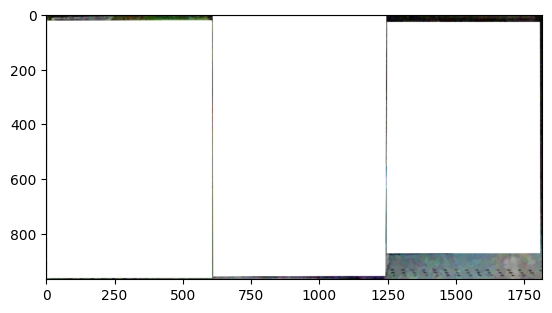

  ref_label                                                dst  \
0  ref5.png  [[[1248.728, 28.878635]], [[1247.297, 873.6296...   
1  ref3.png  [[[3.3605871, 23.72441]], [[3.9205372, 963.905...   
2  ref4.png  [[[610.27014, 6.601509]], [[611.6287, 957.9757...   

                center       width      height num_matches  \
0  (1528.132, 451.002)  561.622009  844.989014         310   
1    (305.65, 493.524)  604.336975   941.14801         296   
2   (927.248, 481.766)  634.932007  951.388977         251   

                                                   M    ref_shape  
0  [[0.7079464104879454, -0.006362602484740679, 1...  (1192, 792)  
1  [[0.671597886960784, 0.0004019253848199173, 3....  (1402, 900)  
2  [[0.7140596619758971, 0.004397614672690912, 61...  (1342, 894)  
14
41
26
39
40
8
15
21
27
47
9
10
13
12
Scene image scene2.png
   Item found ref5.png : [ position: (1528.132, 451.002), width: 561.6220092773438 px, height: 844.989013671875 px ]
   Item found ref3.png : [ positio

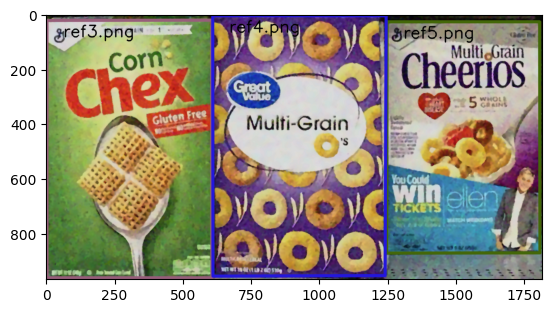

26
20
69
35
20
121
110
172
37
32
11
7
14
19


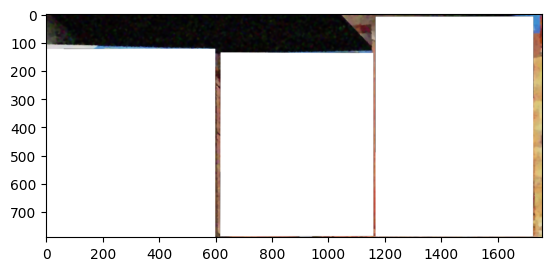

  ref_label                                                dst  \
0  ref6.png  [[[-1.8703393, 123.63265]], [[-1.0998003, 793....   
1  ref7.png  [[[618.6325, 135.75575]], [[617.2568, 787.3576...   
2  ref8.png  [[[1167.7129, 9.194359]], [[1167.7681, 787.661...   

               center       width      height num_matches  \
0   (298.86, 458.291)  601.294006  671.244019         121   
1   (888.81, 461.686)  542.492004  651.601990         110   
2  (1446.93, 398.198)  558.919006  779.294983         172   

                                                   M     ref_shape  
0  [[0.5164247518133925, 0.0005914771462875859, -...  (1300, 1164)  
1  [[0.755603366402848, -0.003575960514721621, 61...    (870, 726)  
2  [[0.7582244056688634, 0.002255816154543604, 11...   (1026, 736)  
12
5
16
24
22
8
5
13
25
11
9
3
5
6
Scene image scene3.png
   Item found ref6.png : [ position: (298.86, 458.291), width: 601.2940063476562 px, height: 671.2440185546875 px ]
   Item found ref7.png : [ position: (88

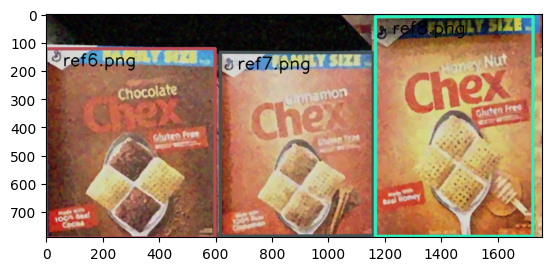

243
58
40
38
43
12
27
63
93
39
4
5
23
57


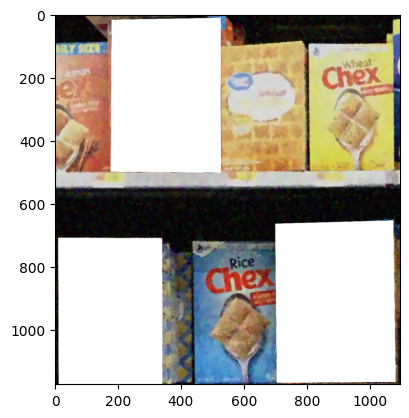

  ref_label                                                dst  \
0  ref1.png  [[[697.1851, 664.8326]], [[702.1802, 1169.645]...   
1  ref8.png  [[[178.75635, 17.605751]], [[175.54146, 499.76...   
2  ref9.png  [[[9.788368, 709.7965]], [[11.303673, 1175.540...   

               center       width      height num_matches  \
0  (887.293, 914.037)  381.597992  514.921021         243   
1  (350.871, 258.021)  349.553009  491.268005          63   
2  (174.846, 942.857)  329.696014  465.743988          93   

                                                   M    ref_shape  
0  [[0.42303098333440103, 4.8417320627039507e-05,...  (1108, 848)  
1  [[0.4566805238011871, -0.0051935341790148555, ...  (1026, 736)  
2  [[0.473279816807184, 0.0015581864395063036, 9....   (992, 698)  
20
23
36
39
21
16
21
29
44
47
12
8
25
19
Scene image scene4.png
   Item found ref1.png : [ position: (887.293, 914.037), width: 381.5979919433594 px, height: 514.9210205078125 px ]
   Item found ref8.png : [ position: 

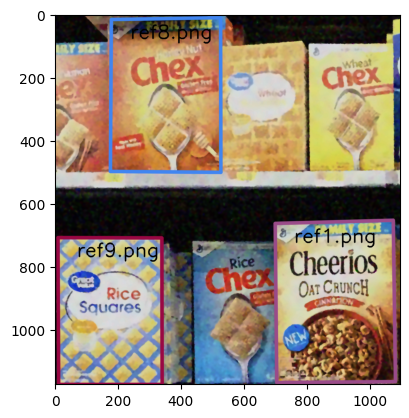

37
39
26
31
22
21
8
25
25
12
172
102
25
30


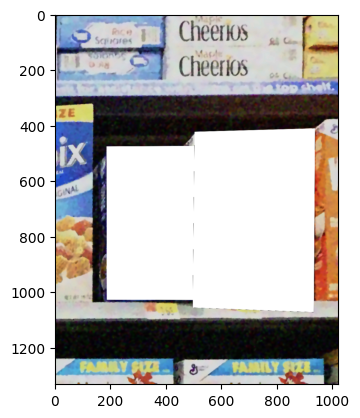

   ref_label                                                dst  \
0  ref11.png  [[[185.2275, 476.22403]], [[186.15096, 1027.90...   
1  ref12.png  [[[502.07465, 423.53735]], [[495.31625, 1056.2...   

               center       width      height num_matches  \
0  (369.033, 751.865)  367.195007  554.546021         172   
1  (715.738, 740.926)  439.562012  661.367981         102   

                                                   M    ref_shape  
0  [[0.6101317998377015, 0.0014951272247524653, 1...   (902, 598)  
1  [[0.5382931517068851, -0.009108421366111886, 5...  (1086, 730)  
35
47
26
41
21
19
10
30
27
15
18
19
21
29
Scene image scene5.png
   Item found ref11.png : [ position: (369.033, 751.865), width: 367.19500732421875 px, height: 554.5460205078125 px ]
   Item found ref12.png : [ position: (715.738, 740.926), width: 439.56201171875 px, height: 661.3679809570312 px ]


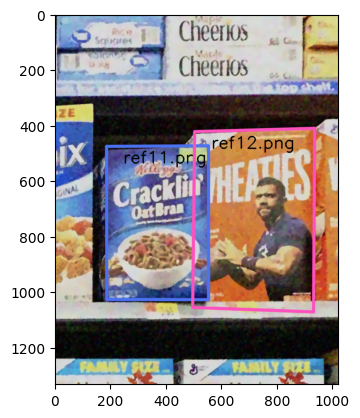

In [181]:
min_match_count = 60
find_items_in_scene_images(min_match_count, track_A_reference_images, track_A_scene_images, lambda_matcher, lambda_homography)

54
9
8
0
6
2
8
2
11
9
0
5
0


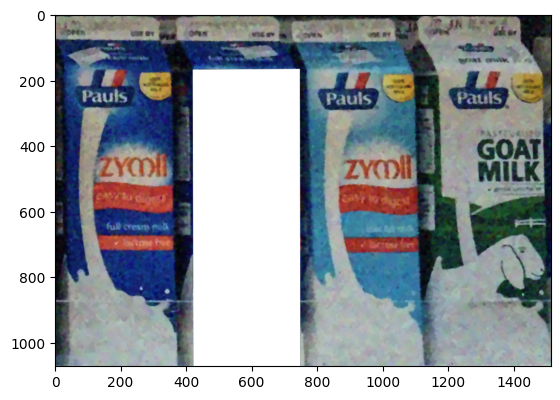

   ref_label                                                dst  \
0  ref15.png  [[[419.47595, 169.09444]], [[421.5146, 1071.45...   

               center       width      height num_matches  \
0  (583.137, 620.087)  327.066986  905.650024          54   

                                                   M   ref_shape  
0  [[0.9933244886430694, 0.0029929775539226035, 4...  (906, 326)  
54
14
9
0
3
2
8
2
11
9
0
5
0


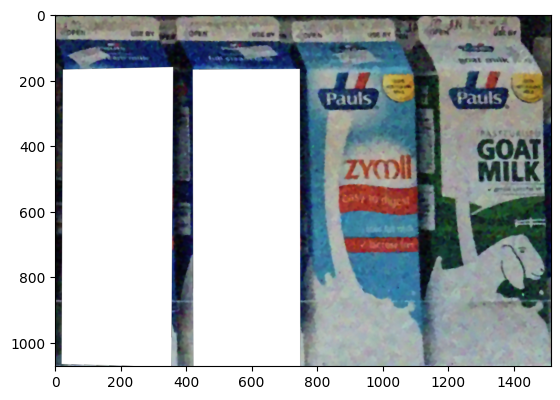

   ref_label                                                dst  \
0  ref15.png  [[[419.47595, 169.09444]], [[421.5146, 1071.45...   
1  ref15.png  [[[23.809492, 169.01328]], [[20.087667, 1065.2...   

               center       width      height num_matches  \
0  (583.137, 620.087)  327.066986  905.650024          54   
1  (189.063, 617.392)  338.835999  912.607971          54   

                                                   M   ref_shape  
0  [[0.9933244886430694, 0.0029929775539226035, 4...  (906, 326)  
1  [[1.011286183301245, -0.004001271954962767, 23...  (906, 326)  
30
9
10
0
5
2
7
2
11
9
3
4
0


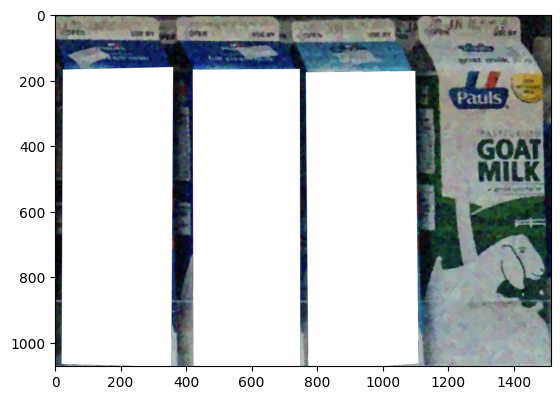

   ref_label                                                dst  \
0  ref15.png  [[[419.47595, 169.09444]], [[421.5146, 1071.45...   
1  ref15.png  [[[23.809492, 169.01328]], [[20.087667, 1065.2...   
2  ref15.png  [[[763.9939, 177.0156]], [[771.4984, 1088.8826...   

               center       width      height num_matches  \
0  (583.137, 620.087)  327.066986  905.650024          54   
1  (189.063, 617.392)  338.835999  912.607971          54   
2  (934.766, 625.701)  342.795013  915.831970          30   

                                                   M   ref_shape  
0  [[0.9933244886430694, 0.0029929775539226035, 4...  (906, 326)  
1  [[1.011286183301245, -0.004001271954962767, 23...  (906, 326)  
2  [[1.1030002186649082, 0.0013431855999578874, 7...  (906, 326)  
20
14
7
0
2
3
9
5
12
12
1
2
0
Scene image scene6.png
   Item found ref15.png : [ position: (583.137, 620.087), width: 327.0669860839844 px, height: 905.6500244140625 px ]
   Item found ref15.png : [ position: (189.063,

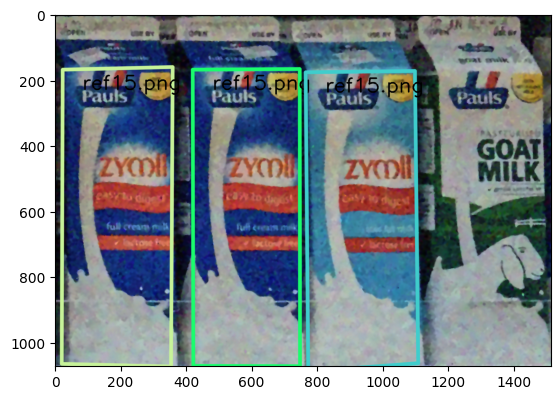

3
118
5
1
4
9
6
2
13
8
4
5
1


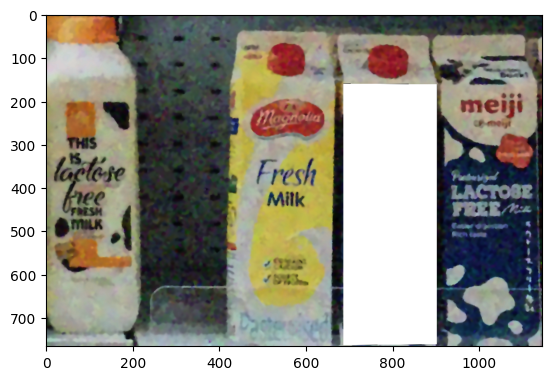

   ref_label                                                dst  \
0  ref16.png  [[[686.7944, 160.37088]], [[686.79395, 763.282...   

               center       width      height num_matches  \
0  (794.668, 461.698)  215.817001  602.911987         118   

                                                   M    ref_shape  
0  [[0.5089898163779665, 0.0003678845822885765, 6...  (1208, 436)  
3
113
6
1
5
11
8
2
15
11
5
4
0


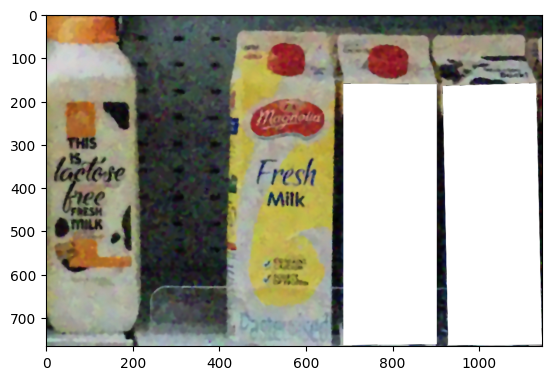

   ref_label                                                dst  \
0  ref16.png  [[[686.7944, 160.37088]], [[686.79395, 763.282...   
1  ref16.png  [[[916.0949, 165.71994]], [[929.0161, 763.7768...   

                center       width      height num_matches  \
0   (794.668, 461.698)  215.817001  602.911987         118   
1  (1030.552, 462.749)  229.274994  604.786011         113   

                                                   M    ref_shape  
0  [[0.5089898163779665, 0.0003678845822885765, 6...  (1208, 436)  
1  [[0.4721598056473994, 0.00858707319876121, 916...  (1208, 436)  
3
19
10
1
6
13
7
3
13
11
6
4
0
Scene image scene7.png
   Item found ref16.png : [ position: (794.668, 461.698), width: 215.81700134277344 px, height: 602.9119873046875 px ]
   Item found ref16.png : [ position: (1030.552, 462.749), width: 229.27499389648438 px, height: 604.7860107421875 px ]


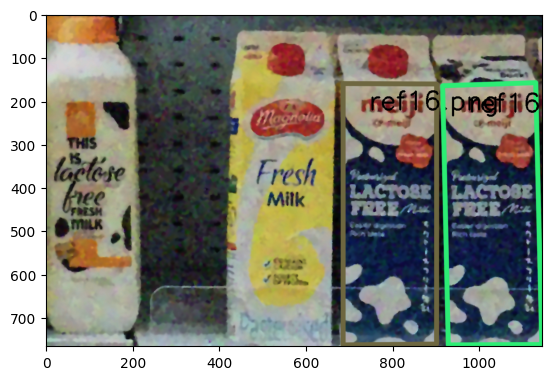

1
6
89
25
5
2
4
2
78
79
4
44
28


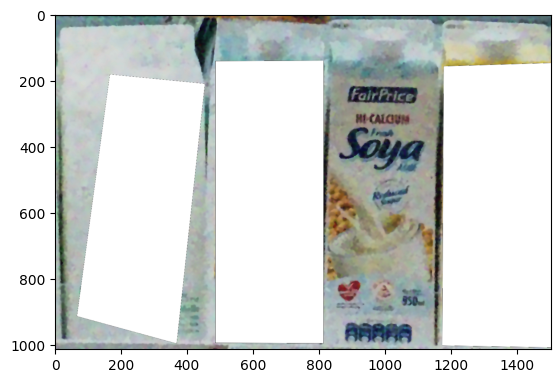

   ref_label                                                dst  \
0  ref24.png  [[[1176.2887, 158.26158]], [[1171.9849, 1002.4...   
1  ref17.png  [[[485.96948, 142.735]], [[485.8775, 994.0572]...   
2  ref26.png  [[[165.77522, 182.5032]], [[66.33748, 913.8926...   

                center       width      height num_matches  \
0  (1339.146, 579.263)  334.170013  860.395996          79   
1   (648.636, 568.342)  325.571991  854.447998          89   
2    (263.005, 575.92)  386.368011  813.969971          44   

                                                   M    ref_shape  
0  [[0.8216485803323625, -0.005924819741581581, 1...   (956, 368)  
1  [[0.9923414704129011, 8.147541193641423e-05, 4...   (854, 326)  
2  [[0.6174344795027926, -0.0971747687157212, 165...  (1068, 420)  
2
7
112
0
1
2
5
2
129
87
7
4
1


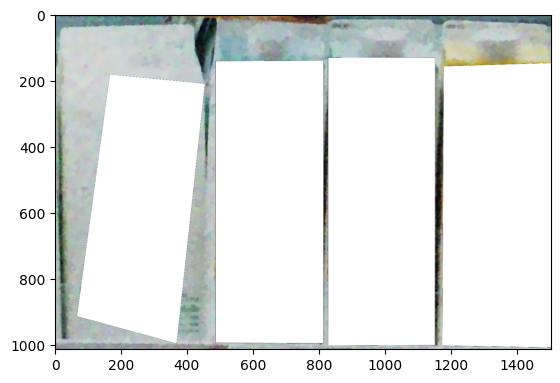

   ref_label                                                dst  \
0  ref24.png  [[[1176.2887, 158.26158]], [[1171.9849, 1002.4...   
1  ref17.png  [[[485.96948, 142.735]], [[485.8775, 994.0572]...   
2  ref26.png  [[[165.77522, 182.5032]], [[66.33748, 913.8926...   
3  ref23.png  [[[826.80756, 131.78833]], [[826.5238, 1002.82...   

                center       width      height num_matches  \
0  (1339.146, 579.263)  334.170013  860.395996          79   
1   (648.636, 568.342)  325.571991  854.447998          89   
2    (263.005, 575.92)  386.368011  813.969971          44   
3   (987.677, 567.116)  322.350006  871.036987         129   

                                                   M    ref_shape  
0  [[0.8216485803323625, -0.005924819741581581, 1...   (956, 368)  
1  [[0.9923414704129011, 8.147541193641423e-05, 4...   (854, 326)  
2  [[0.6174344795027926, -0.0971747687157212, 165...  (1068, 420)  
3  [[0.9004746838344609, -5.5233537141972975e-05,...   (976, 362)  
1
6
7
1
1
1
4

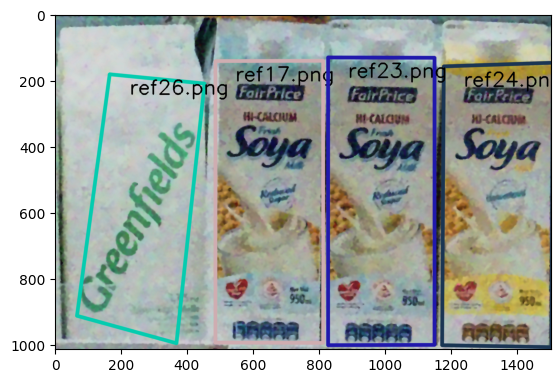

3
13
5
1
43
40
6
1
4
3
1
6
3


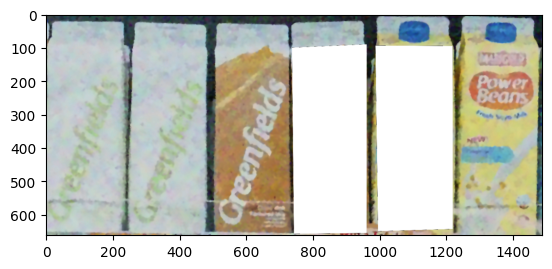

   ref_label                                                dst  \
0  ref19.png  [[[737.6836, 100.45497]], [[743.64233, 657.716...   
1  ref20.png  [[[988.16296, 94.33331]], [[995.94855, 649.824...   

                center       width      height num_matches  \
0   (850.843, 376.015)  223.416000  567.140991          43   
1  (1105.582, 370.764)  231.229996  555.491028          40   

                                                   M    ref_shape  
0  [[0.4758682853684854, 0.02440257023298228, 737...  (1102, 444)  
1  [[0.5467692818542739, 0.03625210065467389, 988...  (1102, 456)  
5
12
2
2
44
32
6
1
4
4
4
8
3


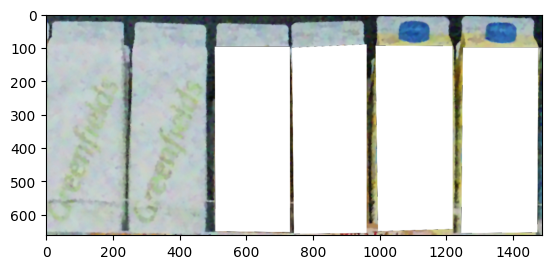

   ref_label                                                dst  \
0  ref19.png  [[[737.6836, 100.45497]], [[743.64233, 657.716...   
1  ref20.png  [[[988.16296, 94.33331]], [[995.94855, 649.824...   
2  ref19.png  [[[506.0833, 97.408966]], [[507.68842, 650.108...   
3  ref20.png  [[[1250.409, 100.21054]], [[1245.8466, 655.847...   

                center       width      height num_matches  \
0   (850.843, 376.015)  223.416000  567.140991          43   
1  (1105.582, 370.764)  231.229996  555.491028          40   
2   (619.063, 374.438)  225.507996  555.372009          44   
3  (1361.386, 377.412)  230.039001  555.637024          32   

                                                   M    ref_shape  
0  [[0.4758682853684854, 0.02440257023298228, 737...  (1102, 444)  
1  [[0.5467692818542739, 0.03625210065467389, 988...  (1102, 456)  
2  [[0.4996177381252061, 0.003322921086680565, 50...  (1102, 444)  
3  [[0.5105474092564528, -0.014436587864681147, 1...  (1102, 456)  
4
11
1
1
6
4


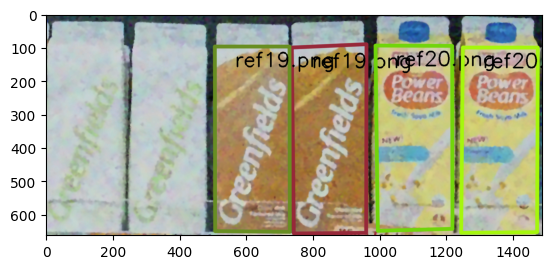

2
7
8
0
2
13
27
25
6
2
3
4
1


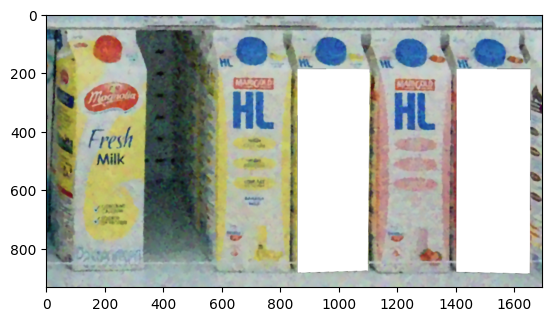

   ref_label                                                dst  \
0  ref21.png  [[[859.6646, 187.22966]], [[859.3728, 882.7956...   
1  ref22.png  [[[1403.8192, 187.66061]], [[1402.9479, 879.73...   

                center       width      height num_matches  \
0   (981.445, 533.368)  247.141998  695.565979          27   
1  (1529.103, 535.121)  253.007996  698.005981          25   

                                                   M    ref_shape  
0  [[0.6376196563488196, 0.01851446382773684, 859...  (1156, 410)  
1  [[0.5818637270599208, 0.005920459299247911, 14...  (1156, 410)  
5
10
8
0
2
17
28
26
11
5
2
8
0


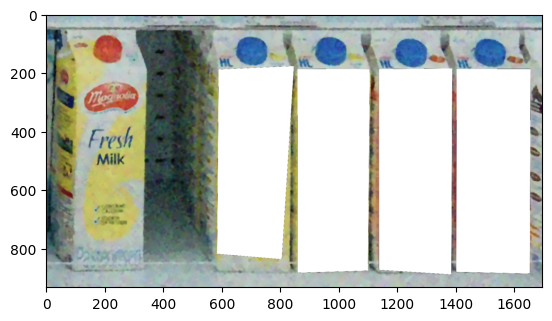

   ref_label                                                dst  \
0  ref21.png  [[[859.6646, 187.22966]], [[859.3728, 882.7956...   
1  ref22.png  [[[1403.8192, 187.66061]], [[1402.9479, 879.73...   
2  ref21.png  [[[590.0782, 188.98639]], [[584.819, 817.9602]...   
3  ref22.png  [[[1138.1844, 188.06548]], [[1138.4817, 872.66...   

                center       width      height num_matches  \
0   (981.445, 533.368)  247.141998  695.565979          27   
1  (1529.103, 535.121)  253.007996  698.005981          25   
2   (706.786, 505.244)  262.046997  659.143982          28   
3  (1262.564, 533.726)  250.035995  702.825012          26   

                                                   M    ref_shape  
0  [[0.6376196563488196, 0.01851446382773684, 859...  (1156, 410)  
1  [[0.5818637270599208, 0.005920459299247911, 14...  (1156, 410)  
2  [[0.5240092062871391, 0.07383678848821124, 590...  (1156, 410)  
3  [[0.5223702817523085, 0.012520579887545442, 11...  (1156, 410)  
3
6
6
0
3
11


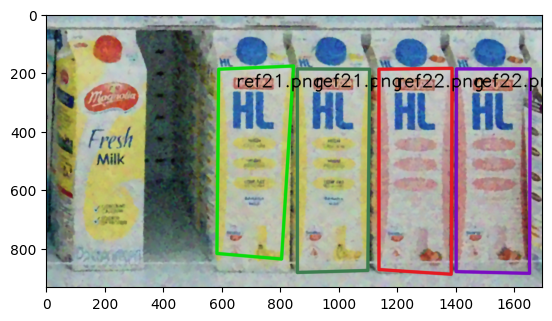

2
7
33
0
3
3
2
4
29
31
38
4
0


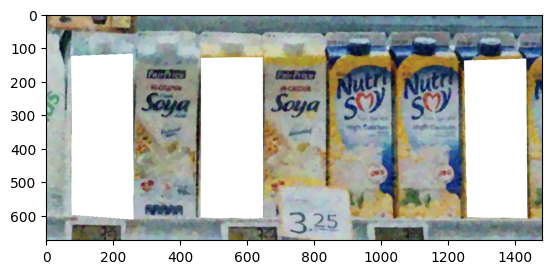

   ref_label                                                dst  \
0  ref24.png  [[[462.98282, 129.41757]], [[461.7641, 607.502...   
1  ref25.png  [[[1248.5872, 138.33516]], [[1257.4199, 606.49...   
2  ref17.png  [[[74.95641, 124.316055]], [[76.12517, 598.847...   

                center       width      height num_matches  \
0   (555.127, 368.784)  186.354996  481.105988          31   
1  (1344.592, 371.417)  189.270996  475.795990          38   
2   (167.979, 363.427)  186.867996  495.513000          33   

                                                   M   ref_shape  
0  [[0.49215317273201065, -0.00566580161821026, 4...  (956, 368)  
1  [[0.44334993021288804, 0.04961258131383867, 12...  (956, 368)  
2  [[0.5327578898093976, 0.0006358185643012491, 7...  (854, 326)  
0
6
31
0
4
3
2
2
29
24
37
2
0


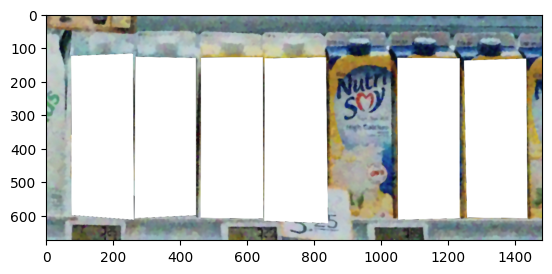

   ref_label                                                dst  \
0  ref24.png  [[[462.98282, 129.41757]], [[461.7641, 607.502...   
1  ref25.png  [[[1248.5872, 138.33516]], [[1257.4199, 606.49...   
2  ref17.png  [[[74.95641, 124.316055]], [[76.12517, 598.847...   
3  ref24.png  [[[652.64594, 131.98886]], [[651.967, 616.227]...   
4  ref25.png  [[[1049.3059, 130.17181]], [[1051.3009, 612.98...   
5  ref17.png  [[[266.56418, 126.98314]], [[264.25293, 608.34...   

                center       width      height num_matches  \
0   (555.127, 368.784)  186.354996  481.105988          31   
1  (1344.592, 371.417)  189.270996  475.795990          38   
2   (167.979, 363.427)  186.867996  495.513000          33   
3   (745.615, 374.958)  190.115997  494.808014          24   
4  (1142.908, 370.831)  186.399994  482.813995          37   
5   (356.516, 366.379)  183.466995  481.364990          31   

                                                   M   ref_shape  
0  [[0.49215317273201065, -0

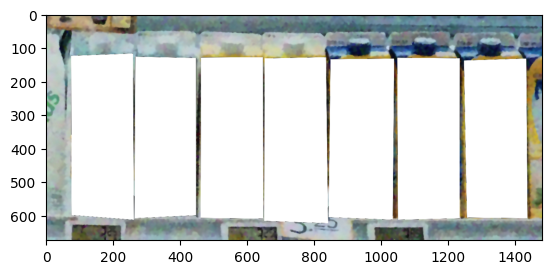

   ref_label                                                dst  \
0  ref24.png  [[[462.98282, 129.41757]], [[461.7641, 607.502...   
1  ref25.png  [[[1248.5872, 138.33516]], [[1257.4199, 606.49...   
2  ref17.png  [[[74.95641, 124.316055]], [[76.12517, 598.847...   
3  ref24.png  [[[652.64594, 131.98886]], [[651.967, 616.227]...   
4  ref25.png  [[[1049.3059, 130.17181]], [[1051.3009, 612.98...   
5  ref17.png  [[[266.56418, 126.98314]], [[264.25293, 608.34...   
6  ref25.png  [[[849.835, 134.50673]], [[844.10925, 605.3053...   

                center       width      height num_matches  \
0   (555.127, 368.784)  186.354996  481.105988          31   
1  (1344.592, 371.417)  189.270996  475.795990          38   
2   (167.979, 363.427)  186.867996  495.513000          33   
3   (745.615, 374.958)  190.115997  494.808014          24   
4  (1142.908, 370.831)  186.399994  482.813995          37   
5   (356.516, 366.379)  183.466995  481.364990          31   
6   (942.206, 371.319)  195.3

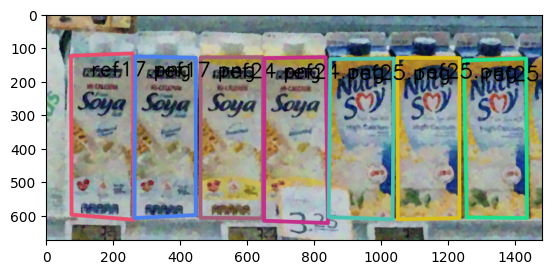

4
10
6
24
1
0
2
0
3
4
2
38
31


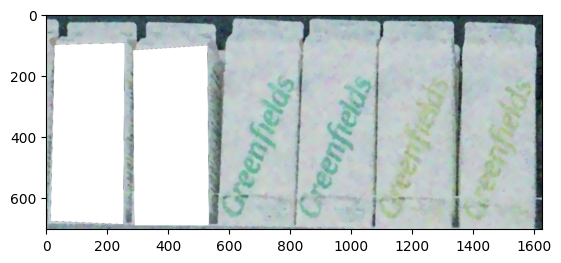

   ref_label                                                dst  \
0  ref27.png  [[[285.08075, 118.388824]], [[289.34863, 691.2...   
1  ref26.png  [[[28.11587, 100.46685]], [[15.030007, 676.720...   

               center       width      height num_matches  \
0  (409.048, 400.846)  248.419006  588.994995          31   
1  (138.073, 389.798)  241.393005  593.142029          38   

                                                   M    ref_shape  
0  [[0.4982749313789744, 0.003081288348163681, 28...  (1068, 460)  
1  [[0.5279080659929617, -0.012826545557634864, 2...  (1068, 420)  
6
8
6
19
1
1
1
0
3
3
2
16
19
Scene image scene12.png
   Item found ref27.png : [ position: (409.048, 400.846), width: 248.41900634765625 px, height: 588.9949951171875 px ]
   Item found ref26.png : [ position: (138.073, 389.798), width: 241.39300537109375 px, height: 593.1420288085938 px ]


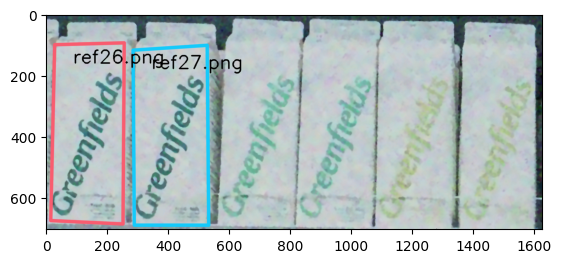

In [180]:
min_match_count = 20
find_items_in_scene_images(min_match_count, track_B_reference_images, track_B_scene_images, lambda_matcher, lambda_homography)

In [99]:
def compute_matches(reference_image, scene_image, perform_matcher):
  sift = cv2.xfeatures2d.SIFT_create()
  kp_reference = sift.detect(reference_image)
  kp_scene = sift.detect(scene_image)
  kp_reference, des_reference = sift.compute(reference_image, kp_reference)
  kp_scene, des_scene = sift.compute(scene_image, kp_scene)
  matches = perform_matcher(des_reference,des_scene)
  return len(matches)

In [100]:
def compute_all_matches(reference_images, scene_image, lambda_matcher):
  matches = []
  for reference_image in reference_images:
    sref_img = reference_image.image
    matches.append(compute_matches(reference_image.image, scene_image.image, lambda_matcher))
  return matches

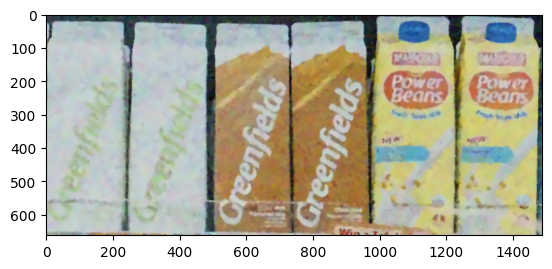

[4, 11, 6, 0, 47, 35, 3, 5, 4, 4, 3, 0, 0]
[4, 11, 6, 0, 47, 35, 3, 5, 4, 4, 3, 0, 0] 82


In [157]:
import itertools

#PROVA CON 10 SU HCOLOR E SU H, E VEDI VALORI PIU' ALTI PER SIGMACOLOR  E SIGMASPACE
# Define the parameter lists
dblateral = [11]
sigmacolor = [75]
sigmaspace = [20]
h = [7]
hcolor = [10]
tempwinsize = [5]
searchwinsize = [25]

# Use itertools.product to get all combinations
combinations = list(itertools.product(dblateral, sigmacolor, sigmaspace, h, hcolor, tempwinsize, searchwinsize))
min_match_count = -1
# Print all combinations
best_res = 0
best_params = []
for combination in combinations:
    dbl, sigcol, sigspac, hs, hco, temwi, seawi = combination
    track_B_scene_images = create_subset_of_images(scene_files,  start=5, end=12, is_colored=1, preprocess=True, dbilateral = dbl, sigmacolor = sigcol, sigmaspace = sigspac, h=hs, hcolor = hco, templatesize = temwi, searchwindowsize = seawi)
    res = compute_all_matches(track_B_reference_images, track_B_scene_images[0], lambda_matcher)
    print(res)
    count = np.array(res)[3:6].sum()
    print(res, count)
    if count>best_res:
        best_res = count
        best_params = [dbl, sigcol, sigspac, hs, hco, temwi, seawi]



In [155]:
best_res

85

In [156]:
best_params

[11, 75, 20, 7, 10, 5, 25]

In [ ]:
res = cv2.matchTemplate(scene_image.image,warped_ref_image,cv2.TM_CCOEFF_NORMED)
print(res)
threshold = 0.5
loc = np.where( res >= threshold)
print(loc)
im_cop = scene_image.image.copy()
for pt in zip(*loc[::-1]):
  cv2.rectangle(im_cop, pt, (pt[0] + 100, pt[1] + 100), (0,0,255), 2)

In [ ]:
def find_items_in_scene_image(min_match_count, reference_images, scene_image, lambda_matcher, lambda_homography):
  df = []
  for reference_image in reference_images:
    result = sift_instance_detection(reference_image, scene_image, lambda_matcher, min_match_count, lambda_homography)
    if result is not None:
      dst, num_matches, M = result
      w_scene,h_scene,_ = scene_image.get_shape()
      w_ref, h_ref, _ = reference_image.get_shape()
      warped_ref_image = cv2.warpPerspective(reference_image.image, M, (h_scene, w_scene))
      warped_ref_image_rgb = cv2.cvtColor(warped_ref_image, cv2.COLOR_BGR2RGB)
      plt.imshow(warped_ref_image_rgb)
      plt.show()
      pts = np.float32([ [0,0],[0,h_ref-1],[w_ref-1,h_ref-1],[w_ref-1,0] ]).reshape(-1,1,2)
      transformed_points = cv2.perspectiveTransform(pts, M)
      transformed_points = transformed_points.reshape((-1, 2))
      print(transformed_points)
      # Calculate bounding box coordinates
      min_x = int(np.min(transformed_points[:, 0]))
      max_x = int(np.max(transformed_points[:, 0]))
      min_y = int(np.min(transformed_points[:, 1]))
      max_y = int(np.max(transformed_points[:, 1]))
            # Crop the transformed image to the bounding box
      print(min_x, max_x, min_y, max_y)
      cropped_image = warped_ref_image[min_y:max_y, min_x:max_x]
      cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
      plt.imshow(cropped_image_rgb)
      plt.show()
      """
      #similarity = cv2.matchTemplate(scene_image.image, warped_ref_image, cv2.TM_CCORR_NORMED)
      warped_ref_image_rgb = cv2.cvtColor(warped_ref_image, cv2.COLOR_BGR2RGB)
      plt.imshow(warped_ref_image_rgb)
      plt.show()

      #if similarity >= threshold:
          # If similarity is above the threshold, draw a rectangle around the detected object
      #    cv2.rectangle(scene_image, (x, y), (x + window_size[0], y + window_size[1]), (255, 0, 0), 2)
      """
      center, width, height =  compute_box_description(dst)
      # qui faccio la proiezione con la M, se trova ALTRI MATCH ALLORA APPENDO PURE QUELLI geniale.
      df.append([reference_image.label, dst, center, width, height, num_matches])
  return pd.DataFrame(df, columns = ['reference_label', 'dst', 'center', 'width', 'height', 'num_matches'])